<a href="https://colab.research.google.com/github/valllllll2000/data-mining-alzheimer/blob/main/DataMiningAlzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto para el curso de Data Mining en CodeOp

## Programa de la presentación

1. Presentarnos:

  Marie Coutart,

  Carolina Kaechele,

  Jocelyn Castro,

  Valeria Rogatchevskikh

2. Problematica y objectivos del proyecto

  * Predecir el Alzheimer teniendo datos clinicos del paciente como el MMSE (examen del estado mental), el CDR (Clasificación clinica de la demencia) y el volumen del cerebro.
  * Analizar el riesgo de patir Alzheimer segun ciertas factores socioeconomicos como: la edad, el nivel de educación, el nivel sociocultural.
  * Posibilidad de usar conclusiones para software de diagnostico

3. Resumir, descripcion de los datos y de la base de datos

Origen de los datos: Kaggle

Link: https://www.kaggle.com/datasets/brsdincer/alzheimer-features

Tamaño:
10 Columnas y ~373 lineas

Detalles de las columnas:

- **Grupo** --> Clase, posibles valores: Demented, Nondemented, Converted
- **Edad** --> Edad, de 60 a 98
- **EDUC** --> Años de Educación, de 6 a 23
- **SES** --> Estado Socioeconómico / 1 (Bajo) - 5 (Alto)
- **MMSE** --> Examen del Estado Mental Mínimo de 4 (Demencia severa) a 30 (Sin demencia)
- **CDR** --> Clasificación Clínica de Demencia de 0 (sin demencia) a 2 (con demencia)
- **eTIV** --> Volumen Intracraneal Total Estimado de 1106 a 2024
- **nWBV** --> Volumen Total del Cerebro Normalizado 0,64 a 0,84
- **ASF** --> Factor de Escalamiento del Atlas 0,88 a 1,59

#### 1. MMSE (Examen del Estado Mental Mínimo)
Evalua la función cognitiva (memoria, orientación, atención y lenguaje). La puntuación total varía de 0 a 30, una puntuación inferior a 24 sugiere posible demencia, cuanto más bajo peor es el estado de demencia.

####  2. CDR (Clasificación Clínica de Demencia)
Evalue la gravedad de la demencia basada en entrevistas y evaluaciones clínicas. Evalúa las habilidades cognitivas y funcionales en diferentes dominios.  
Varía de 0 (sin demencia) a 3 (demencia severa).

####  3. eTIV (Volumen Intracraneal Total Estimado)
Medida del volumen total dentro del cráneo, que incluye el cerebro, el líquido cefalorraquídeo y otras estructuras. Rango de 1,200 a 1,800 cm³ para adultos.  
- **Hombres:** de 1,400 a 1,600 cm³.  
- **Mujeres:** de 1,100 a 1,400 cm³.  
Puede haber variaciones individuales basadas en la edad, el sexo y la demografía de la población.

####  4. nWBV (Volumen Total del Cerebro Normalizado)
Representa el volumen total del cerebro normalizado por el volumen intracraneal total (eTIV). Ayuda a evaluar la atrofia cerebral, util para el estudio de enfermedades degenerativas. Porcentaje del volumen intracraneal total. Normalmente varía del 75% al 95% del eTIV.  
Un nWBV normal podría estar alrededor del 80% al 90%.
Los valores más bajos pueden indicar atrofia cerebral, común en condiciones como el Alzheimer.

####  5. ASF (Factor de Escalamiento del Atlas)
Un factor utilizado para escalar datos de neuroimagen a un atlas estándar, permitiendo comparaciones entre sujetos.

4. Limpieza de datos, explicar el porque y enseñar codigo
5. Analisis exploratorio:
  - Exploración de datos: mostrar datos con graficas, por ejemplo por edad, sexo, educacion
  - Mostrar las graficas outliers (Joselyn las tenia muy bien hechas)
  - Correlaciones?? kendall o otro?
  - Llegar a conclusiones
6. Mineria de datos:
  - Arbol de decision
  - Arbol de clasificacion y evaluar las metricas, validacion cruzada?
7. Evaluación del modelo y resultados
8. Crear presentación en Canva y añadir capturas??


Ideas de conclusiones:
* Educacion y posibilidad de tener Alzheimer
* Importancia del factor socio economico: si o no?
* Atrofia cerebral (nWBV)
* Edad


In [107]:
# Celula que contiene todos los imports
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

In [114]:
# abrimos el fichero CSV
url = 'https://raw.githubusercontent.com/valllllll2000/data-mining-alzheimer/refs/heads/main/alzheimer.csv'
df = pd.read_csv(url)

# organizacion de los datos:
# Mostrar las primeras filas
print('Primeras filas del dataset:')
print(df.head())
print('\n')

# Resumen del dataframe
print('Resumen de nuestro DataFrame:')
print(df.info())
print('\n')

# Estadísticas descriptiva
print('Estadisticas descriptivas:')
print(df.describe())
print('\n')

Primeras filas del dataset:
         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1  Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2     Demented   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3     Demented   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4     Demented   M   80    12  NaN  22.0  0.5  1698  0.701  1.034


Resumen de nuestro DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    flo

Conclusion: aqui podemos ver las columnas y filas y vemos que en las columnas SES y MMSE faltan datos para algunas filas (los datos son nulos).

In [115]:
# Limpieza de datos
# Rellenamos con la mediana para las columnas MMSE y SES
# para MMSE rellenamos con la mediana que corresponde al grupo
df['MMSE'] = df.groupby('Group')['MMSE'].transform(lambda x: x.fillna(x.median()))
df['SES'] = df['SES'].fillna(df['SES'].median())

# Resumen del dataset
print(df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB
None




## Conclusiones:

Podemos observar que ya no faltan datos y que todas las columnas tienen el mismo número de datos.

## Problema:
La columna Group tiene posibles valores de 'Demented' (Con demencia), 'Nondemented' (sin demencia) y 'Converted'. Para poder decidir que significa 'Converted' y como podemos clasificar este grupo de pacientes, hemos hecho el siguiente analisis:

In [110]:
# Calucular medias para comparar los valores significativos del Alzheimer y entender mejor la columna 'Converted'
mmse_media = df.groupby('Group')['MMSE'].mean()
display(mmse_media)
cdr_media = df.groupby('Group')['CDR'].mean()
display(cdr_media)
nWBV_media = df.groupby('Group')['nWBV'].mean()
display(nWBV_media)
ASF_media = df.groupby('Group')['ASF'].mean()
display(ASF_media)

,MMSE
Group,
Converted,28.675676
Demented,24.534247
Nondemented,29.226316


,CDR
Group,
Converted,0.256757
Demented,0.671233
Nondemented,0.005263


,nWBV
Group,
Converted,0.723730
Demented,0.716301
Nondemented,0.740900


,ASF
Group,
Converted,1.212405
Demented,1.196890
Nondemented,1.191063


## Conclusiones:
Los datos no permiten determinar con seguridad si la clase 'Converted' se refiere a personas que han pasado de sanos a dementes o al revés, en la base de datos original no hay ninguna información sobre ello y por eso para nuestro analisis decidimos borrar (limpiar) estas filas.

In [116]:
# Limpiamos las filas que contienen Converted
df = df[df['Group'] != 'Converted']
print(df.info())

print('\n')

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   336 non-null    object 
 1   M/F     336 non-null    object 
 2   Age     336 non-null    int64  
 3   EDUC    336 non-null    int64  
 4   SES     336 non-null    float64
 5   MMSE    336 non-null    float64
 6   CDR     336 non-null    float64
 7   eTIV    336 non-null    int64  
 8   nWBV    336 non-null    float64
 9   ASF     336 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 28.9+ KB
None




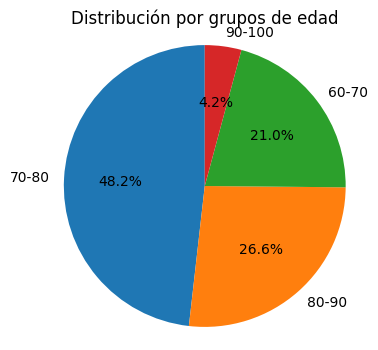

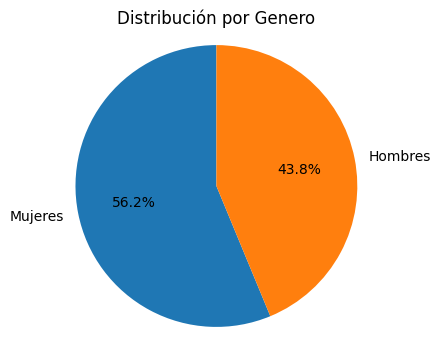

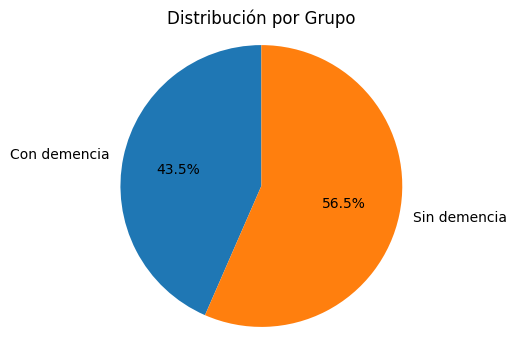



Numero de pacientes por genero
M/F
F    189
M    147
Name: count, dtype: int64




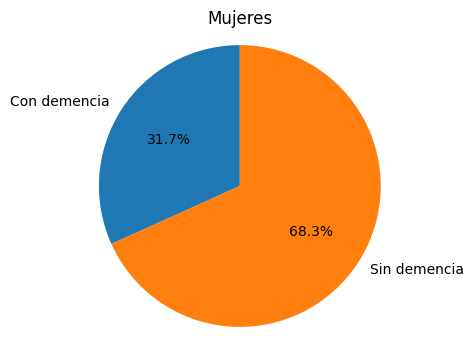

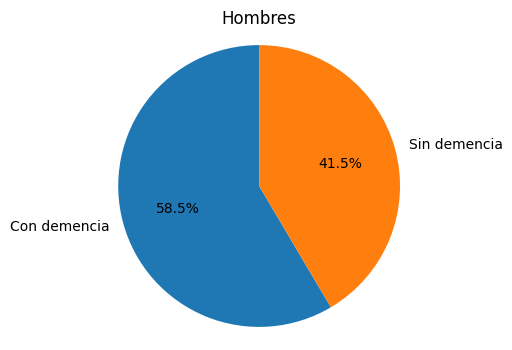

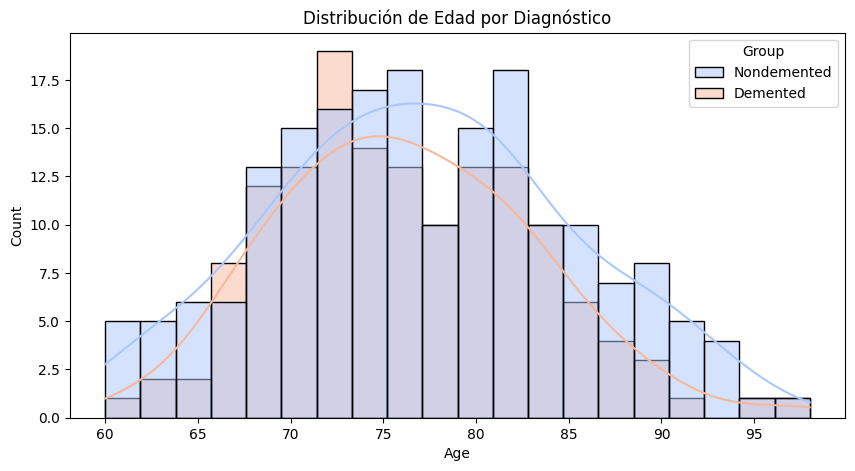

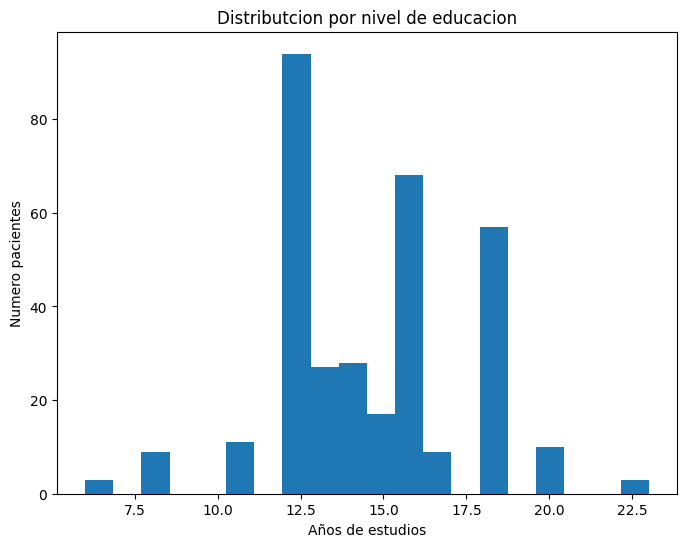

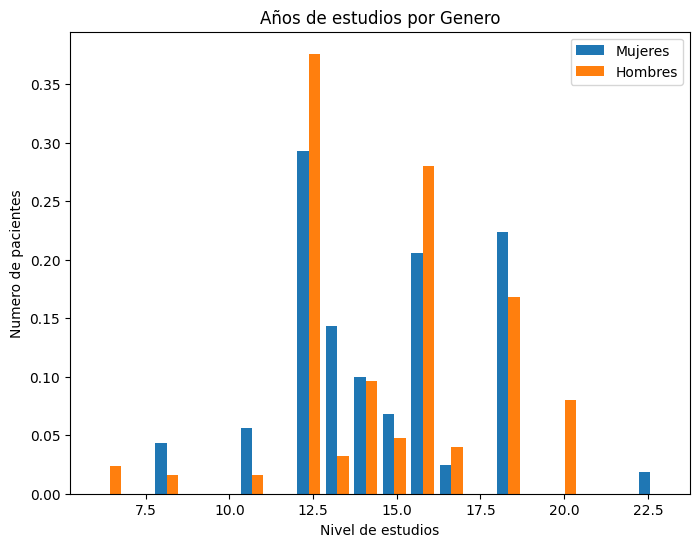

In [72]:
# Exploracion, graficos...

def create_pie_chart(group_counts, labels, title):
    """
    Crea un grafico pastel con las etiquetas y el título especificados.

    Args:
        group_counts: Una lista o Serie que contiene los datos para el gráfico de pastel.
        labels: Una lista de etiquetas para las porciones del pastel.
        title: El título del gráfico de pastel.
    """
    plt.figure(figsize=(4, 4))
    plt.pie(group_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal') # Equal asegura que el pastel se dibuje como un círculo.
    plt.show()
    print("\n")


# Por edad
age_bins = [60, 70, 80, 90, 100]
age_labels = ['60-70', '70-80', '80-90', '90-100']

# Nueva columna con groupos de edad
df.loc[:, 'Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Contar totales por cada groupo de edad
age_group_counts = df['Age_Group'].value_counts()

# Crear grafico
create_pie_chart(age_group_counts, age_group_counts.index, 'Distribución por grupos de edad')

# borrar columna por edad
df = df.drop('Age_Group', axis=1)

# Contar ocorrencias por genero
gender_group_count = df['M/F'].value_counts()

# Crear grafico
create_pie_chart(gender_group_count, ['Mujeres', 'Hombres'], 'Distribución por Genero')

# Contar ocorrencias por grupo (Demented y Nondemented)
group_counts = df['Group'].value_counts()
group_counts = group_counts.sort_index()

# Crear grafico
create_pie_chart(group_counts,['Con demencia', 'Sin demencia'], 'Distribución por Grupo')

# Count the occurrences of each gender
gender_counts = df['M/F'].value_counts()

# Print the counts
print("Numero de pacientes por genero")
print(gender_counts)
print("\n")

# Count the occurrences of each group for women
women = df[df['M/F'] == 'F']
group_counts_women = women['Group'].value_counts()
group_counts_women = group_counts_women.sort_index()

# Crear grafico
create_pie_chart(group_counts_women,['Con demencia', 'Sin demencia'], 'Mujeres')

# Count the occurrences of each group for men
men = df[df['M/F'] == 'M']
group_counts_men = men['Group'].value_counts()
group_counts_men = group_counts_men.sort_index()

# Crear grafico
create_pie_chart(group_counts_men,['Con demencia', 'Sin demencia'], 'Hombres')

demented_data = df[df['Group'] != 'Nondemented']['Age']
non_demented_data = df[df['Group'] == 'Nondemented']['Age']

# Distribución de edad por grupo
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Age", hue="Group", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución de Edad por Diagnóstico")
plt.show()
print('\n')

plt.figure(figsize=(8, 6))
plt.hist(df['EDUC'], bins=20)
plt.title('Distributcion por nivel de educacion')
plt.xlabel('Años de estudios')
plt.ylabel('Numero pacientes')
plt.show()
print('\n')

women_education = df[df['M/F'] == 'F']['EDUC']
men_education = df[df['M/F'] == 'M']['EDUC']
plt.figure(figsize=(8, 6))
# Como hay más mujeres que hombres en el conjunto de datos adaptamos los datos usando la densidad
# se está comparando la proporción de hombres y mujeres en cada nivel de estudios, en lugar del número absoluto
plt.hist([women_education, men_education], bins=20, density=True, label=['Mujeres', 'Hombres'])
plt.legend()
plt.title('Años de estudios por Genero')
plt.xlabel('Nivel de estudios')
plt.ylabel('Numero de pacientes')
plt.show()
print('\n')

## Conclusiones:
* Casi la mitad de los pacientes tienen entre 70 y 80 años que es el grupo más numeroso.
* Hay un poco más de pacientes mujeres que de hombres.
* Hay un poco mas de 40% de los pacientes con demencia y el resto sin.
* Proporcionalemnte hay más hombres que mujeres con demencia.
* El nivel de estudios más comun es de 12,5 años de escolarización.
* Los niveles de estudios de los hombres y de las mujeres no permiten destacar diferencias significativas entre los generos.

In [73]:
# Selectionar las columnas numericas
df_numerico = df[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

# Calcular la media, la mediana y la moda
media = df_numerico.mean()
mediana = df_numerico.median()
moda = df_numerico.mode().iloc[0]

print("Mean:\n", media)
print("\nMedian:\n", mediana)
print("\nMode:\n", moda)


Mean:
 Age       76.711310
EDUC      14.502976
SES        2.514881
MMSE      27.187500
CDR        0.294643
eTIV    1491.306548
nWBV       0.730211
ASF        1.193595
dtype: float64

Median:
 Age       76.000
EDUC      14.000
SES        2.000
MMSE      29.000
CDR        0.000
eTIV    1475.000
nWBV       0.731
ASF        1.190
dtype: float64

Mode:
 Age       73.000
EDUC      12.000
SES        2.000
MMSE      30.000
CDR        0.000
eTIV    1483.000
nWBV       0.739
ASF        1.184
Name: 0, dtype: float64


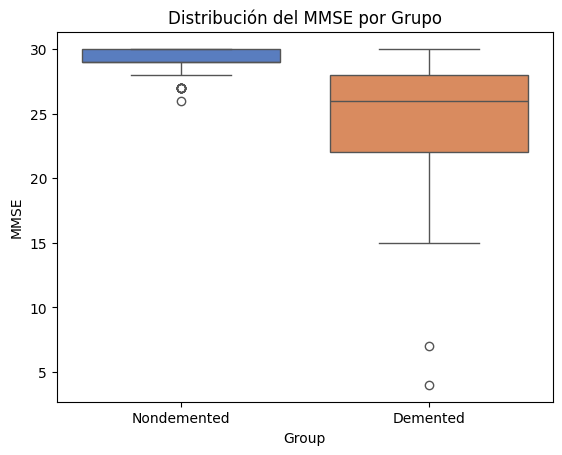

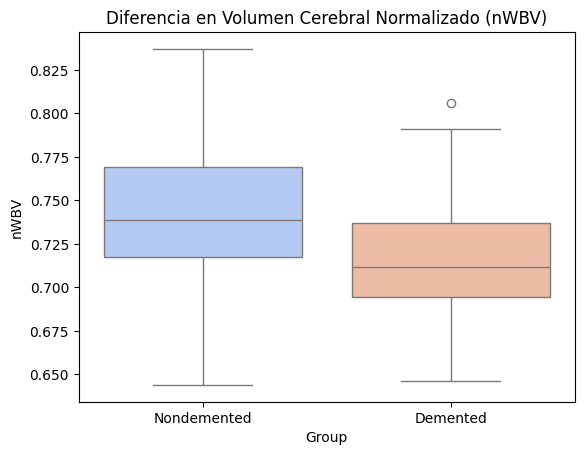

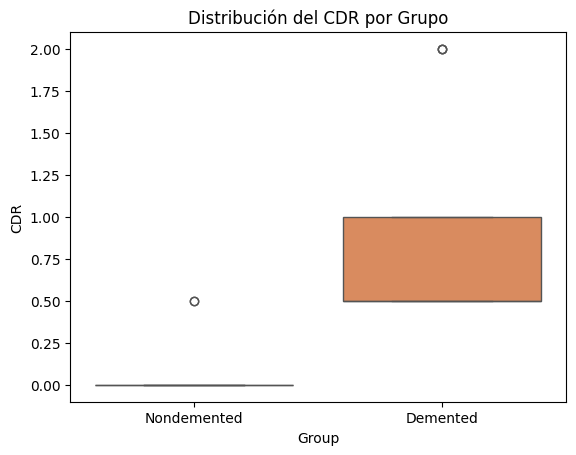

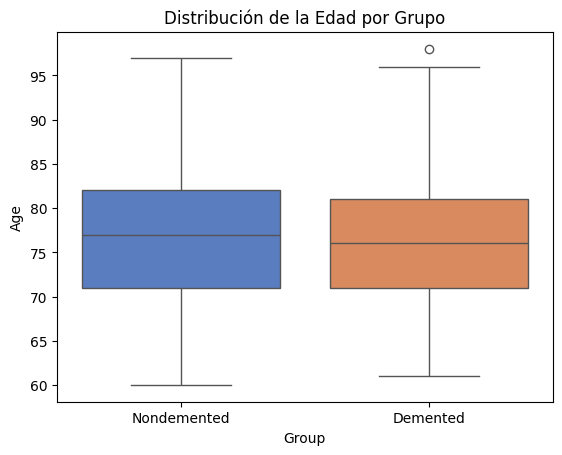

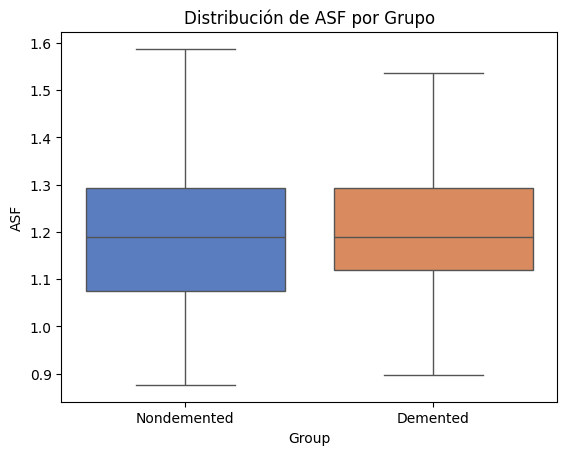

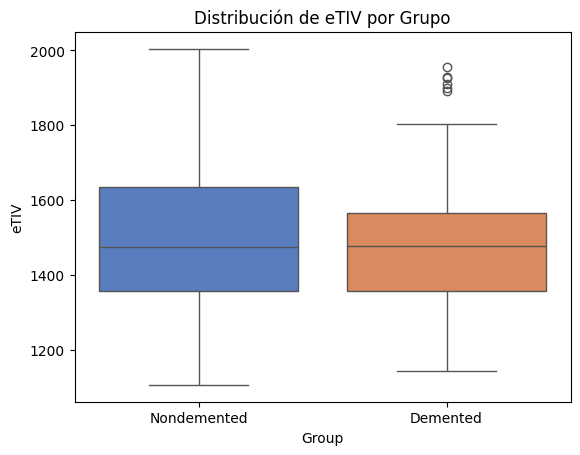

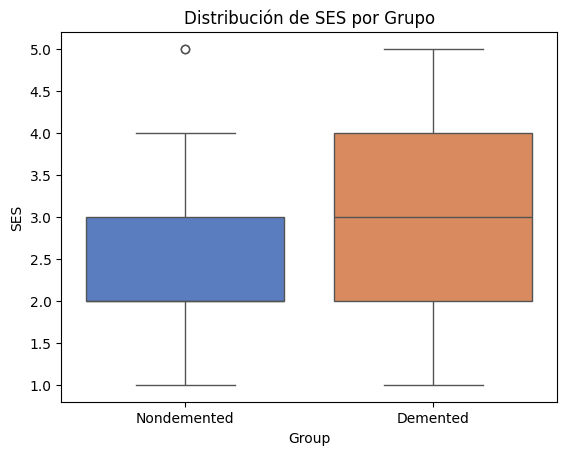

In [74]:
# Comparación de MMSE por grupo para confirmar que los valores de MMSE son más
# bajos en pacientes con demencia.
sns.boxplot(x="Group", y="MMSE", hue="Group", data=df, palette="muted")
plt.title("Distribución del MMSE por Grupo")
plt.show()
print('\n')

# Volumen cerebral (nWBV) y demencia
# El nWBV deberia ser más bajo en pacientes con demencia.
sns.boxplot(x="Group", y="nWBV", hue="Group", data=df, palette="coolwarm")
plt.title("Diferencia en Volumen Cerebral Normalizado (nWBV)")
plt.show()
print('\n')

# El CDR es mas bajo, ceracano a 0 en pacientes sanos y augmente en funcion de la gravedad de la enfermedad
sns.boxplot(x="Group", y="CDR", hue="Group", data=df, palette="muted")
plt.title("Distribución del CDR por Grupo")
plt.show()
print('\n')

# La hipotesis es que cuanto más avanzada es la edad, más probabilidad de tener demencia
sns.boxplot(x="Group", y="Age", hue="Group", data=df, palette="muted")
plt.title("Distribución de la Edad por Grupo")
plt.show()
print('\n')

# La hipotesis es que el ASF puede estar influenciado por la presencia de demencia
sns.boxplot(x="Group", y="ASF", hue="Group", data=df, palette="muted")
plt.title("Distribución de ASF por Grupo")
plt.show()
print('\n')

# La hipotesis es que el eTIV puede estar influenciado por la presencia de demencia
sns.boxplot(x="Group", y="eTIV", hue="Group", data=df, palette="muted")
plt.title("Distribución de eTIV por Grupo")
plt.show()
print('\n')

# La hipotesis es que el nivel sociocultural puede influenciar la presencia de demencia
sns.boxplot(x="Group", y="SES", hue="Group", data=df, palette="muted")
plt.title("Distribución de SES por Grupo")
plt.show()
print('\n')


## Conclusiones:
* El MMSE es más alto en pacientes sanos, pero se observan algunos outliers
* Las personas sanas tienden a tener un volumen intercraneal normalizado (nWBV) más alto.
* El CDR suele ser de 0 en pacientes sanos (con algunos outliers) pero este valor es más alto en personas con Alzheimer. Aun asi, al mayoria de los pacientes presentan una demencia ligera.
* La distribución por edad es similar en los dos grupos.
* El ASF (factor de escalamiento del atlas) es similar en los dos grupos.
* El eTIV no presenta diferencias significativas entre los dos grupos aunque haya muchos outliers en el grupo con demencia.
* El grupo de las personas con demencia, parece tener un estatus economico más alto.

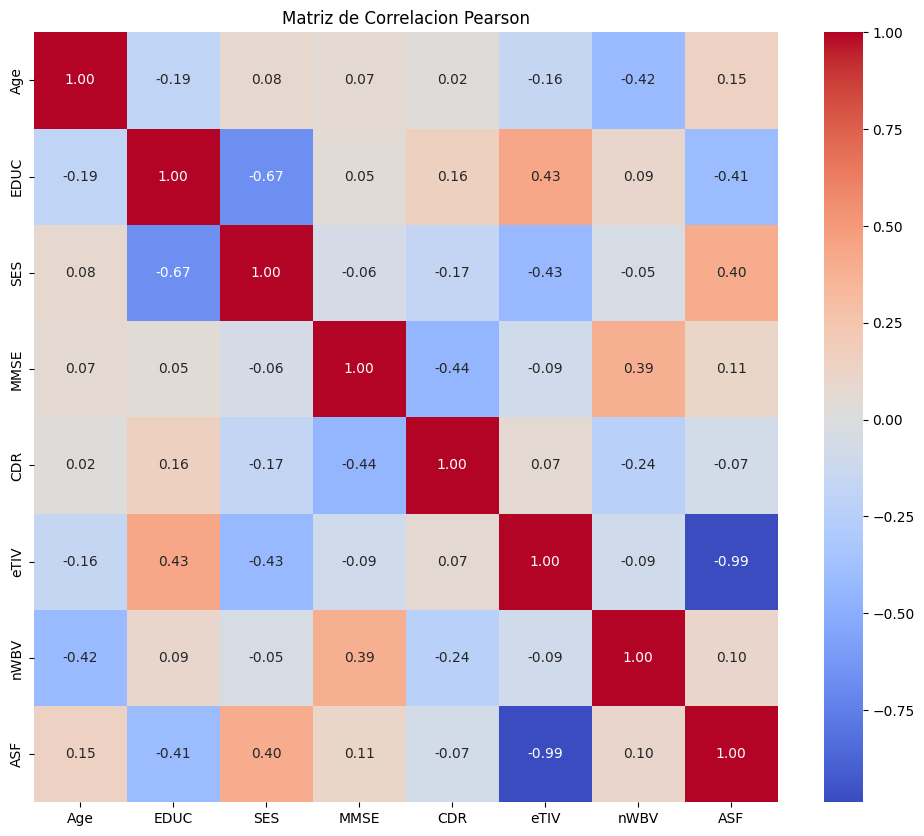

In [75]:
demented_df = df[df['Group'] == 'Demented']

# Seleccionar solo datos numericos
numerical_df = demented_df.select_dtypes(include=['number'])

# Calculatar la matriz de correlación
correlation_matrix = numerical_df.corr(method='pearson')

# Mostrar la graficá
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlacion Pearson')
plt.show()

# Valores de referencia
# Alto	0.7 to 1.0	Relación fuerte entre las variables
# Medio	0.3 to 0.7	Relación moderada
# Bajo	0.0 to 0.3	Poca o sin relación

# Correlación positiva (0 < r ≤ 1): A medida que una variable aumenta, la otra también tiende a aumentar. Una correlación positiva perfecta es +1.
# Correlación Negativa (-1 ≤ r < 0): A medida que una variable aumenta, la otra tiende a disminuir. Una correlación negativa perfecta es -1.
# Sin Correlación (r = 0): No existe una relación lineal entre las variables.

##**Conclusiones**
Solo observamos correlaciones medias:
* A mayor edad, menor nWBV (Volumen del Cerebro)
* A mayor nivel educativo, menor escala de atlas
* A mayor nivel educativo, mayor eTIV (Volumen intercraneal)
* A mayor nivel sociocultural, menor eTIV (Volumen intercraneal)
* A mayor nivel sociocultural, mayor escala de atlas
* A mayor CDR, menor MMSE

No nos permite concluir que haya alguna correlación fuerte y decidimos crear un arbol de decision.


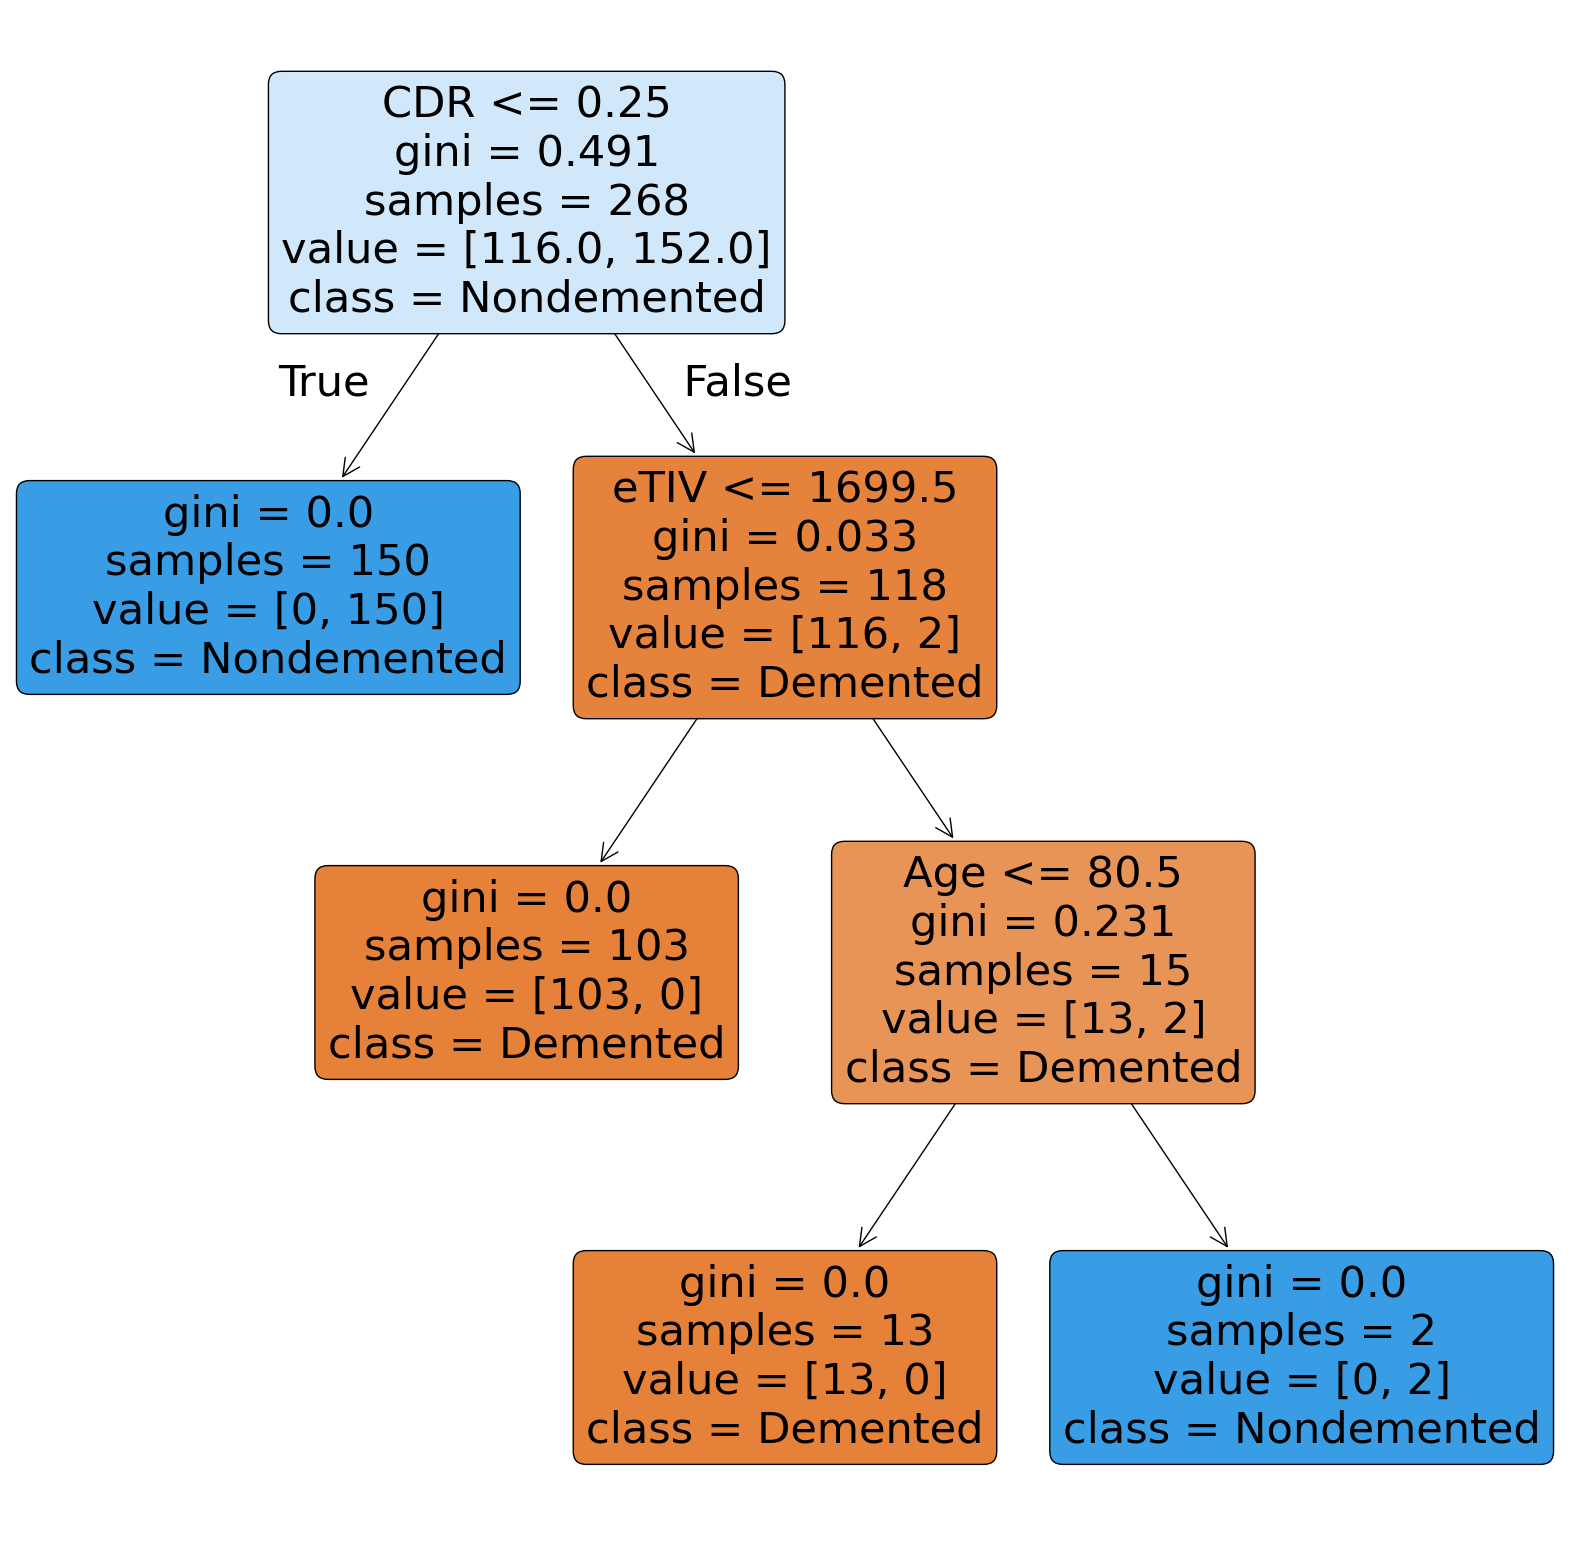

Precisión del modelo: 0.99
Precisión:  0.9852941176470589
Precisión (macro):  0.9871794871794872
Recall (macro):  0.9833333333333334
Matriz de Confusión:
 [[29  1]
 [ 0 38]]


In [148]:
# Classificación:

# abrimos el fichero CSV
url = 'https://raw.githubusercontent.com/valllllll2000/data-mining-alzheimer/refs/heads/main/alzheimer.csv'
df = pd.read_csv(url)

# Limpiamos
df['MMSE'] = df.groupby('Group')['MMSE'].transform(lambda x: x.fillna(x.median()))
df['SES'] = df['SES'].fillna(df['SES'].median())
df = df[df['Group'] != 'Converted']

# Convertir características categóricas en variables dummy
df = pd.get_dummies(df, columns=['Group'], drop_first=True)
df = pd.get_dummies(df, columns=['M/F'], drop_first=True)

# Definir características (X) y objetivo (y)
X = df.drop(['Group_Nondemented', 'SES'], axis=1)
y = df['Group_Nondemented']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20,20))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=['Demented','Nondemented' ])
plt.show()

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular métricas de clasificación
print("Precisión (macro): ", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro): ", recall_score(y_test, y_pred, average='macro'))

# Calcular la matriz de confusión
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

## Conclusiones:
* La precision del modelo es muy alta. Este valor representa la proporción de las instancias classificadas correctamente sobre el nombre total de las instancias. Esto indica que nuestro modelo es muy preciso.
* La puntuación de la exactitud es tambien muy alta. Este valor representa la proporción de las instancias classificadas correctamente sobre el nombre total de las instancias positivas. Los casos positivos son correctamente identificados por el modelo.
* La matriz de confusion confirma la alta precision del modelo. El modelo solo se ha equivocado una vez, identificando un caso negativo como si fuera positivo.
* El arbol de decision muestra que las características más importantes para la predicción fueron el CDR, el eTIV y la edad.

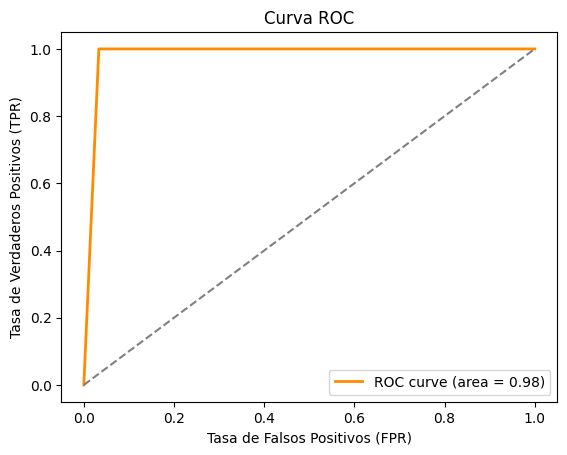

In [149]:
# Obtener las probabilidades de predicción
y_score = model.predict_proba(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Conclusiones:
La curva ROC confirma la alta precision del modelo.

# Conclusiones del Análisis de Datos de Alzheimer

## Introducción
Teniamos varias hipotesis sobre el conjunto de datos. Algunas fueran refutadas o los datos existentes no han podido confirmar o refutar estas hipotesis. Para eso caldria una base de datos mas grande.
El otro objetivo de este análisis fue utilizar un árbol de decisión para predecir la demencia en pacientes a partir de un conjunto de datos proporcionado. Además, evaluamos el rendimiento del modelo utilizando diversas métricas de clasificación y regresión.

## Preprocesamiento de Datos
1. Manejo de Valores Faltantes: Se rellenaron los valores faltantes en la columna `MMSE` utilizando la mediana correspondiente a cada grupo. Se decidió eliminar las columnas SES y los datos de pacientes clasificados como "Converted".
2. Codificación de Variables Categóricas: Se convirtieron las variables categóricas `Group` y `M/F` en variables dummy.

## Entrenamiento del Modelo
Utilizamos un clasificador de árbol de decisión para entrenar el modelo.

## Evaluación del Modelo
El modelo ha dado muy buenos resultados pero hay que recordar que se trata de una base de datos pequeña y que no hemos podido acceder a otra base de datos para hacer otras pruebas.